## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Project Overview
The Organization is expanding in to Aviation industry to diversify its portfolio and is interested in purchasing and operating airplanes for commercial and private enterprises.The analysis below supports in identifying and offering insights into potential risks of aircraft to help drive business decisions.  

## Goals
1.Determining which aircraft are the lowest risk for the company to start this new business endeavor.

2.Support strategic aircraft acquisition through data-driven insights.

## Data Source
A dataset from National Transportation Safety Board that includes aviation accident data from 1962 to 2023 and selected incidents in the United States and international waters.


In [2]:
# Importing libraries
import pandas as pd # for data manipulation and analysis
import numpy as np   # for numerical operations
import matplotlib.pyplot as plt # for plotting and visualizations
import seaborn as sns # for statistical data visualization

%matplotlib inline 

In [3]:
#Importing/Converting Aviation Data into a DataFrame for Exploratory Data Analysis 
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Exploratory Data Analysis with pandas

### Initial data inspection

In [4]:
df.info() # to get an overview of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [5]:
"""The dataset has 31 columns with 90348 rows. The data types is a mixture of objects(26) and floats(5). The dataset has alot of missing values,only Investigation.Type column has no missing value.This means there is need to conduct data cleaning first before EDA"""

'The dataset has 31 columns with 90348 rows. The data types is a mixture of objects(26) and floats(5). The dataset has alot of missing values,only Investigation.Type column has no missing value.This means there is need to conduct data cleaning first before EDA'

In [6]:
#Generating summary statistics for numeric columns.
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Data Cleaning

Data cleaning is the process of detecting and correcting (or removing) inaccurate, incomplete, inconsistent, or irrelevant data from a dataset to improve its quality and reliability for analysis.

In [9]:
# Total number of duplicated rows
df.duplicated().sum()

1390

In [10]:
# View duplicated rows
df[df.duplicated()]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
64050,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64052,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64388,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64541,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64552,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90004,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90010,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90031,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Dropping duplicates and assigning a new variable df_clean
df_clean = df.drop_duplicates()
df_clean.shape

(88958, 31)

In [17]:
# Removing white spaces from df_clean
string_cols = df_clean.select_dtypes(include='object').columns # Identify string (object) columns


In [18]:
df_clean = df[string_cols].apply(lambda x: x.str.strip())

In [13]:
# checking for missing values
df_clean.isnull().sum()

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Latitude                  54576
Longitude                 54585
Airport.Code              38709
Airport.Name              36168
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
FAR.Description           56935
Schedule                  76376
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: i

In [19]:
# drop columns that will not help in data analysis
drop_cols = [
    'Event.Id',                 
    'Accident.Number',          
    'Airport.Code',             
    'Aircraft.Category',        
    'FAR.Description',          
    'Schedule',                 
    'Air.carrier',             
    'Report.Status',           
    'Publication.Date'          
]

In [23]:
#Dropping the columns from df_clean dataframe
df_clean = df.drop(columns=drop_cols)

In [24]:
# viewing the remaining columns
df_clean.columns

Index(['Investigation.Type', 'Event.Date', 'Location', 'Country', 'Latitude',
       'Longitude', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight'],
      dtype='object')

In [25]:
# Confirming the columns are dropped
df_clean.shape

(90348, 22)

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      90348 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88837 non-null  object 
 3   Country                 88663 non-null  object 
 4   Latitude                34382 non-null  object 
 5   Longitude               34373 non-null  object 
 6   Airport.Name            52790 non-null  object 
 7   Injury.Severity         87889 non-null  object 
 8   Aircraft.damage         85695 non-null  object 
 9   Registration.Number     87572 non-null  object 
 10  Make                    88826 non-null  object 
 11  Model                   88797 non-null  object 
 12  Amateur.Built           88787 non-null  object 
 13  Number.of.Engines       82805 non-null  float64
 14  Engine.Type             81812 non-null

In [26]:
df_clean['Latitude'].head()

0          NaN
1          NaN
2    36.922223
3          NaN
4          NaN
Name: Latitude, dtype: object

In [27]:
#Converting column latitude and Longitude from type objects to type floats
df_clean[['Latitude', 'Longitude']] = df_clean[['Latitude', 'Longitude']].apply(pd.to_numeric, errors='coerce')

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      90348 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88837 non-null  object 
 3   Country                 88663 non-null  object 
 4   Latitude                11986 non-null  float64
 5   Longitude               11974 non-null  float64
 6   Airport.Name            52790 non-null  object 
 7   Injury.Severity         87889 non-null  object 
 8   Aircraft.damage         85695 non-null  object 
 9   Registration.Number     87572 non-null  object 
 10  Make                    88826 non-null  object 
 11  Model                   88797 non-null  object 
 12  Amateur.Built           88787 non-null  object 
 13  Number.of.Engines       82805 non-null  float64
 14  Engine.Type             81812 non-null

In [31]:
df_clean['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

In [32]:
#Standardize case for the weather column
df_clean['Weather.Condition'] = df_clean['Weather.Condition'].str.upper().str.strip()

In [33]:
#Fixing the data type for Event.Date column
df_clean['Event.Date']=pd.to_datetime(df_clean['Event.Date'], errors ='coerce')

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      90348 non-null  object        
 1   Event.Date              88889 non-null  datetime64[ns]
 2   Location                88837 non-null  object        
 3   Country                 88663 non-null  object        
 4   Latitude                11986 non-null  float64       
 5   Longitude               11974 non-null  float64       
 6   Airport.Name            52790 non-null  object        
 7   Injury.Severity         87889 non-null  object        
 8   Aircraft.damage         85695 non-null  object        
 9   Registration.Number     87572 non-null  object        
 10  Make                    88826 non-null  object        
 11  Model                   88797 non-null  object        
 12  Amateur.Built           88787 non-null  object

In [41]:
df_clean['Broad.phase.of.flight'].unique()

array(['Cruise', 'Unknown', 'Approach', 'Climb', 'Takeoff', 'Landing',
       'Taxi', 'Descent', 'Maneuvering', 'Standing', 'Go-around', 'Other',
       nan], dtype=object)

In [48]:
# Normalize Case & Strip Whitespace
df_clean.loc[:, 'Make'] = df_clean['Make'].str.upper().str.strip()

In [49]:
#  filter out rows with fewer than 3 characters or all uppercase names with spaces (like people's names)
df_clean = df_clean[df_clean['Make'].str.len() > 2]

In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88823 entries, 0 to 90347
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      88823 non-null  object        
 1   Event.Date              88823 non-null  datetime64[ns]
 2   Location                88771 non-null  object        
 3   Country                 88598 non-null  object        
 4   Latitude                11983 non-null  float64       
 5   Longitude               11971 non-null  float64       
 6   Airport.Name            52773 non-null  object        
 7   Injury.Severity         87840 non-null  object        
 8   Aircraft.damage         85647 non-null  object        
 9   Registration.Number     87544 non-null  object        
 10  Make                    88823 non-null  object        
 11  Model                   88774 non-null  object        
 12  Amateur.Built           88723 non-null  object

## Data Exploration(EDA)

Now that we have cleaned the data. We now carry out Exploratory Data Analysis which involves examining and visualizing a dataset to understand its structure, patterns, trends, and relationships before formal modeling or hypothesis testing.

In [65]:
#Extract year
df_clean['Year']=df_clean['Event.Date'].dt.year
df_clean.head()

,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Airport.Name,Injury.Severity,Aircraft.damage,Registration.Number,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Year
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,Fatal(2),Destroyed,NC6404,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,1948
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,Fatal(4),Destroyed,N5069P,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,1962
2,Accident,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,Fatal(3),Destroyed,N5142R,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,1974
3,Accident,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,Fatal(2),Destroyed,N1168J,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,1977
4,Accident,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,Fatal(1),Destroyed,N15NY,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,1979


In [73]:
# Converting Year column to type string
df_clean['Year'] = df_clean['Year'].astype(float).astype(str)

In [74]:
#Top aircrafts with most accidents
df_clean['Make'].value_counts()

CESSNA                 27149
PIPER                  14870
BEECH                   5372
BOEING                  2745
BELL                    2722
                       ...  
EUGENE WELLS               1
DEVENPORT                  1
SMITH CARTER A             1
HAYES/PIETENPOL            1
BUXBAUM MARK EDWARD        1
Name: Make, Length: 7584, dtype: int64

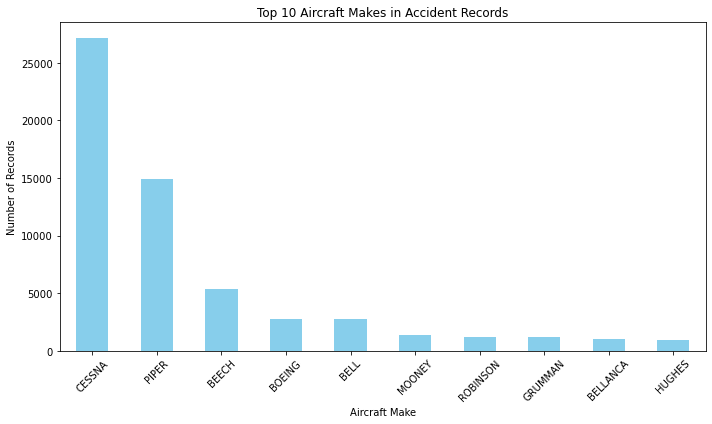

In [53]:
# Get the top 10 most common aircraft makes
top_makes = df_clean['Make'].value_counts().head(10)

# Plot
top_makes.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Aircraft Makes in Accident Records')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [75]:
#Fatal Injuries by engine type
FatalitiesByEngineType = df_clean.groupby('Engine.Type')['Total.Fatal.Injuries'].sum().sort_values(ascending=False)
FatalitiesByEngineType

Engine.Type
Reciprocating      23636.0
Turbo Fan           4560.0
Unknown             3770.0
Turbo Prop          2568.0
Turbo Shaft         1695.0
Turbo Jet            862.0
Electric               2.0
None                   1.0
Hybrid Rocket          1.0
UNK                    0.0
NONE                   0.0
LR                     0.0
Geared Turbofan        0.0
Name: Total.Fatal.Injuries, dtype: float64

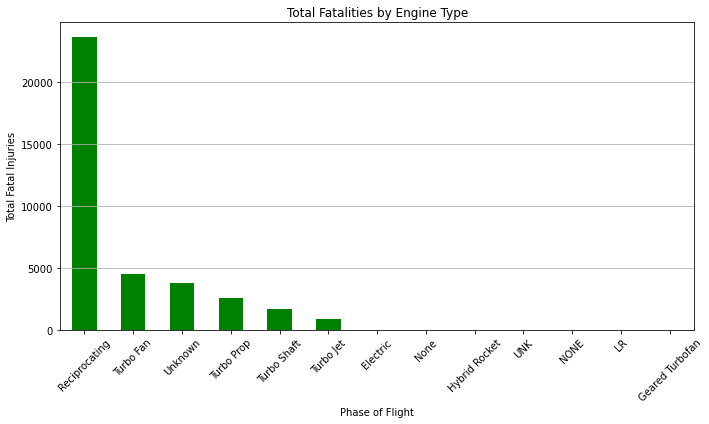

In [69]:
FatalitiesByEngineType.plot(kind='bar', figsize=(10, 6), color='green')

plt.title('Total Fatalities by Engine Type')
plt.xlabel('Phase of Flight')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [76]:
FatalitiesByPhaseOfFlight= df_clean.groupby('Broad.phase.of.flight')['Total.Fatal.Injuries'].sum().sort_values(ascending=False)
FatalitiesByPhaseOfFlight

Broad.phase.of.flight
Cruise         6172.0
Maneuvering    5323.0
Takeoff        4302.0
Approach       3840.0
Climb          1762.0
Descent         913.0
Unknown         749.0
Go-around       587.0
Landing         518.0
Standing        161.0
Taxi            102.0
Other            85.0
Name: Total.Fatal.Injuries, dtype: float64

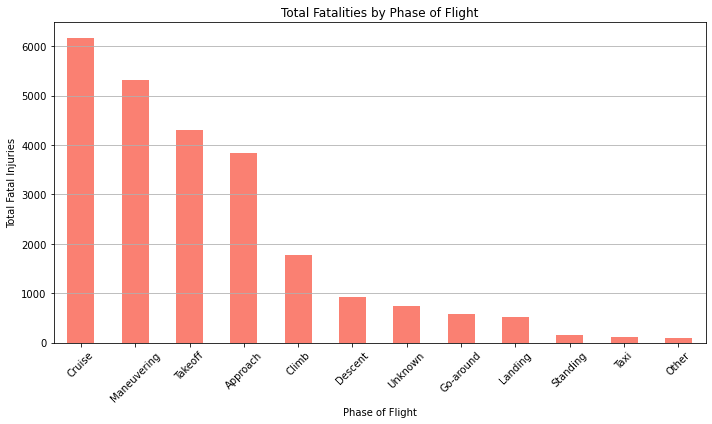

In [71]:
#Fatalities by phase of flight
FatalitiesByPhaseOfFlight.plot(kind='bar', figsize=(10, 6), color='salmon')

plt.title('Total Fatalities by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

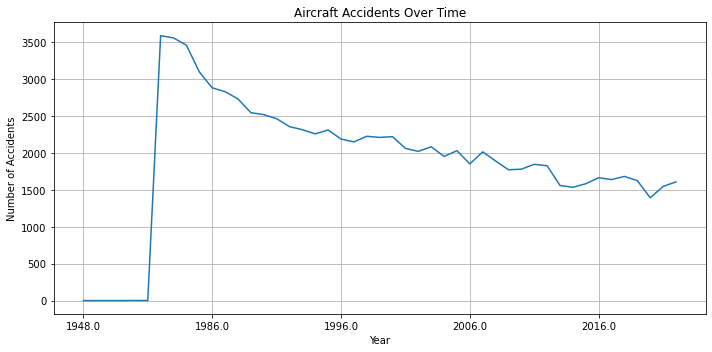

In [77]:
#Yearly accident trend
df_clean['Year'].value_counts().sort_index().plot(kind='line', figsize=(10, 5))

plt.xlabel('Year')                     
plt.ylabel('Number of Accidents')      
plt.title('Aircraft Accidents Over Time') 
plt.grid(True)                       

plt.tight_layout()
plt.show()


In [80]:
#Export file as CSV for visualization
df_clean.to_csv('Aviation_Data_Analysis.csv', index=False)


In [79]:
import os
os.getcwd()

'C:\\Users\\June Wendy\\documents\\Flatiron\\Assignments\\phase1_project\\dsc-phase-1-project-v3'